<a href="https://colab.research.google.com/github/Hassan-Mahadjir/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression** (Python Implementation)
#### Linear regression is a statistical method that is used to predict a continuous dependent variable i.e target variable based on one or more independent variables. This technique assumes a linear relationship between the dependent and independent variables which means the dependent variable changes proportionally with changes in the independent variables.

### [Implementatin of Types of Linear Regression](https://www.geeksforgeeks.org/machine-learning/linear-regression-python-implementation/)
 - Simple Linear Regression
 - Multiple Linear Regression
 - Polynomial Linear Regression

In [1]:
# Simple Linear Regression
# for predicting a response using a single feature. (used to predict numbers)
# the task is to find a line that fits best (known as regression line)


## Simple Linear Regression
### Regression line is define as:
`h(x_i) = B0 + B1*x_i`
- h(x_i) represents the predicted response vlaue for i^th observation
- b0 and b1 are regression coefficients and represent the y-intercept and slope of the regression line respectively.


To create our model we must "learn" or estimate the values of regression coefficients b_0 and b_1.

We need to use the principle of **[Least Squares](https://www.geeksforgeeks.org/data-science/ordinary-least-squares-ols-using-statsmodels/)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Estimating Coefficients Function
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # cacluate cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_x*m_y
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)



This function plot_regression_line(), takes the input data x (independent variable), y (dependent variable) and the estimated coefficients b to plot the regression line and the data points.

In [3]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # Predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

In [13]:
def main():
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

  # estimating coefficients
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \
  \nb_1 = {}".format(b[0], b[1]))

  # means
  print("Mean of x: ", np.mean(x))
  print("Mean of y: ", np.mean(y))

  # Sxx values
  print("Sxy value: ",np.sum(y*x) - np.size(x)*np.mean(x)*np.mean(y))
  print("Sxx value: ",np.sum(x*x) - np.size(x)*np.mean(x)*np.mean(x))
  # plotting regression line
  plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 1.2363636363636363   
b_1 = 1.1696969696969697
Mean of x:  4.5
Mean of y:  6.5
Sxy value:  96.5
Sxx value:  82.5


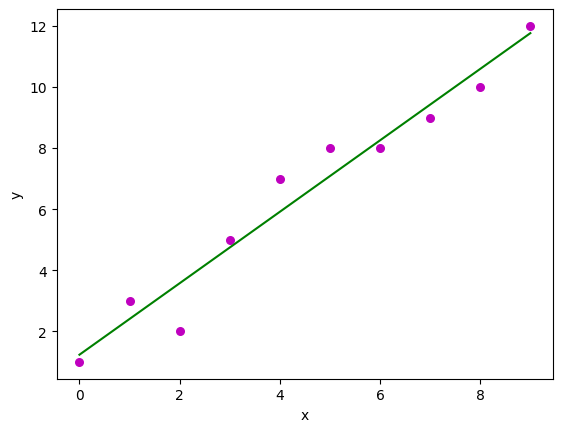

In [14]:
main()

## Multiple Linear Regression
_Multiple linear regression attempts to model the relationship between **two** or **more** features and a response by fitting a linear equation to the observed data._

In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd

In [17]:
data_url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",skiprows=22, header=None)

In [19]:
X = np.hstack([raw_df.values[::2, :],raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]
Variance score: 0.7634174432138486


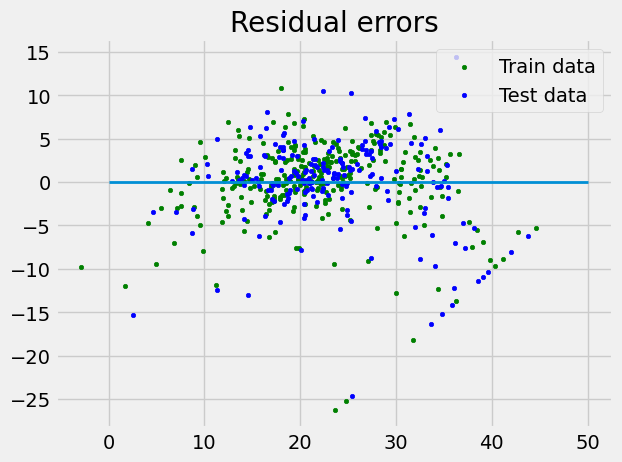

In [24]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()